In [1]:
# ------------------------------------------------------------
# Linear Models for Regression
# ------------------------------------------------------------
# Regression is a supervised learning type where we predict
# a continuous value (e.g., predicting house price from
# region, size, number of bedrooms, etc.).
#
# Typical steps in a Machine Learning project:
# 1. Problem formulation
# 2. Collecting the data
# 3. Exploratory Data Analysis (EDA)
# 4. Data Processing
# 5. Choosing and Training a model
# 6. Evaluating a model
# 7. Improving a model
#
# In short: Define the problem → Collect data → Explore & clean →
# Train a model → Evaluate → Improve.
# ------------------------------------------------------------

# 1. Problem Formulation
A real estate agent asks for help to build a model that can predict house prices based on features like region, size, and number of bedrooms.

There are many possible models (Random Forests, Decision Trees, Neural Networks), but it’s best to start simple. Since this is not a very complex problem, we will use Linear Regression.

Understanding the problem is not only about choosing the right model but also about doing proper data processing and error analysis.

# 2. Collecting the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Feature Information:

1. longitude – How far west the house is (higher = farther west)
2. latitude – How far north the house is (higher = farther north)
3. housing_median_age – Median age of houses in the block (lower = newer)
4. total_rooms – Total rooms in the block
5. total_bedrooms – Total bedrooms in the block
6. population – Number of people living in the block
7. households – Number of households in the block
8. median_income – Median household income (in tens of thousands USD)
9. median_house_value – Median house value (in USD)
10. ocean_proximity – House location relative to the ocean/sea

Source: Kaggle

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
len(df)

20640

In [6]:
len(df.columns)

10

# 3. Exploratory Data Analysis (EDA)

Spliting data into training and testing sets to avoid data leakage.

Training set → used to train the model

Testing set → used to evaluate the model

Using scikit-learn function to split the data before analysis.

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state = 20)

print('Size of train data: {}\nSize of test data: {}'.format(len(train_data), len(test_data)))

Size of train data: 16512
Size of test data: 4128


Copying the training data to revert it in case I mess things up:

In [8]:
train_data_1 = train_data.copy()

In [9]:
train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,16512.0,NaN,NaN,NaN,-119.567038,1.999237,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,16512.0,NaN,NaN,NaN,35.627891,2.133117,32.55,33.94,34.26,37.71,41.95
housing_median_age,16512.0,NaN,NaN,NaN,28.629482,12.610702,1.0,18.0,29.0,37.0,52.0
total_rooms,16512.0,NaN,NaN,NaN,2625.408794,2153.454223,6.0,1450.0,2127.0,3148.0,39320.0
total_bedrooms,16344.0,NaN,NaN,NaN,537.006914,417.933626,2.0,296.0,436.0,646.0,6445.0
population,16512.0,NaN,NaN,NaN,1421.184532,1104.984981,3.0,785.0,1166.0,1722.0,28566.0
households,16512.0,NaN,NaN,NaN,499.194949,380.218028,2.0,279.0,410.0,605.0,6082.0
median_income,16512.0,NaN,NaN,NaN,3.871777,1.899704,0.4999,2.5643,3.53255,4.75,15.0001
median_house_value,16512.0,NaN,NaN,NaN,206782.355378,114707.45867,14999.0,120075.0,180100.0,264700.0,500001.0
ocean_proximity,16512,5,<1H OCEAN,7326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,168
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
print('The percentage of missing values in total_bedrooms is: {}'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The percentage of missing values in total_bedrooms is: 1.0174418604651163


### Checking values in the categorical feature(s)

In [12]:
train_data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,7326
INLAND,5217
NEAR OCEAN,2129
NEAR BAY,1836
ISLAND,4


<Axes: xlabel='count', ylabel='ocean_proximity'>

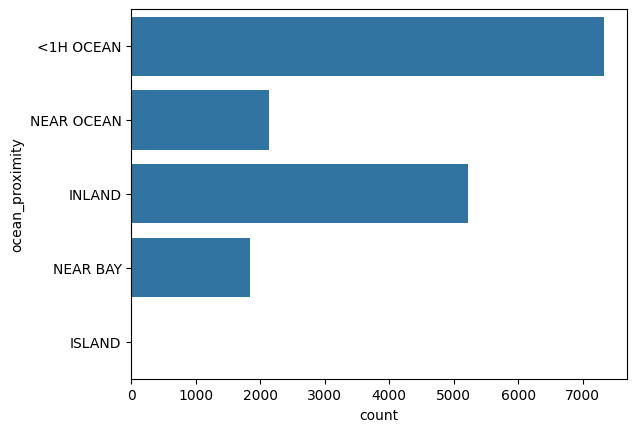

In [13]:
sns.countplot(train_data['ocean_proximity'])

### Checking correlation between feature

<Axes: >

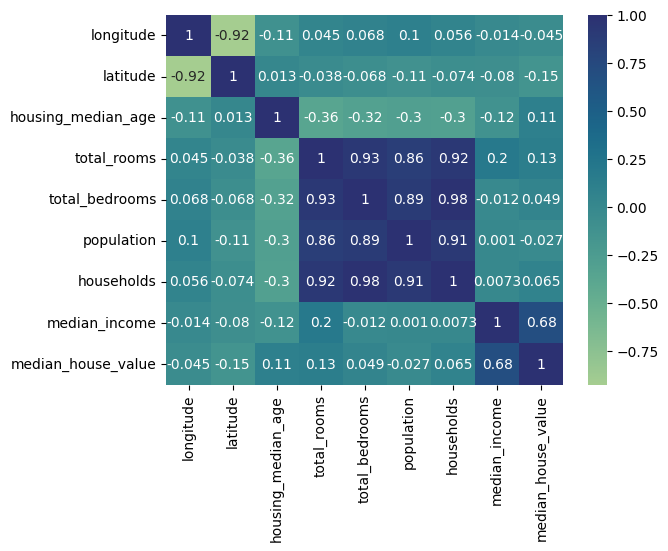

In [14]:
correlation = train_data.drop('ocean_proximity', axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='crest')

#### Correlation Insights:


*   `total_bedrooms` ↔ `households` and `total_bedrooms` ↔ `total_rooms` are highly correlated.

    * Makes sense: more people → more rooms/bedrooms.

*   `median_house_value` ↔ `median_income` is also strongly correlated.
    * Higher income → can afford higher-priced houses.

### Plotting Geographical Features

<Axes: xlabel='longitude', ylabel='latitude'>

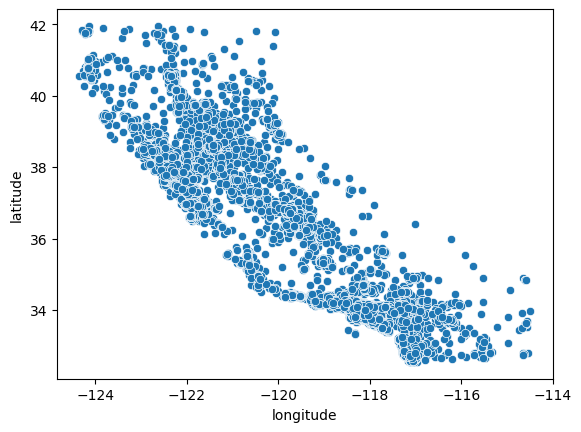

In [15]:
sns.scatterplot(data=train_data, x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

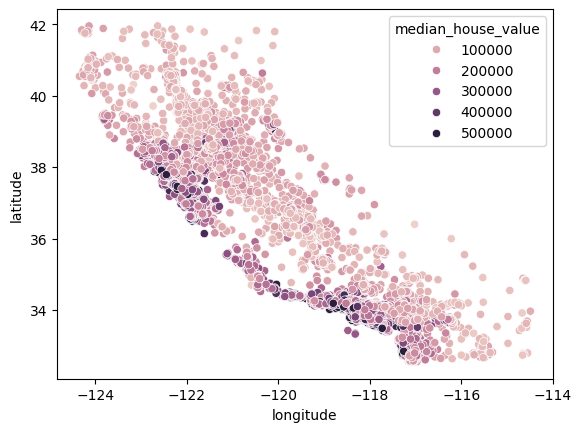

In [16]:
sns.scatterplot(data=train_data, x='longitude', y='latitude', hue='median_house_value')

It makes sense that the most expensive houses are those close to sea. We can verify that with the `ocean_proximity`.

<Axes: xlabel='longitude', ylabel='latitude'>

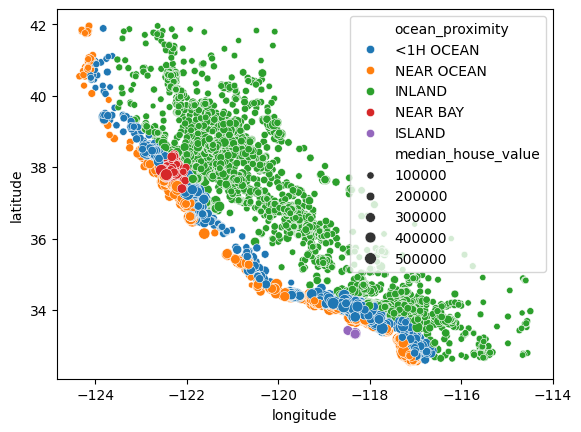

In [17]:
sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', size='median_house_value')

Yup, all houses near the ocean are very expensive compared to other areas.

### Exploring Relationship Between Individual Features

Below is the relationship between median income and the price of the house.

<Axes: xlabel='median_house_value', ylabel='median_income'>

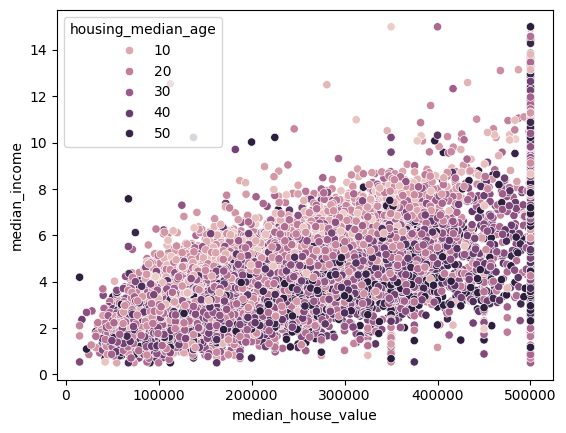

In [18]:
sns.scatterplot(data=train_data, x='median_house_value', y='median_income', hue='housing_median_age')

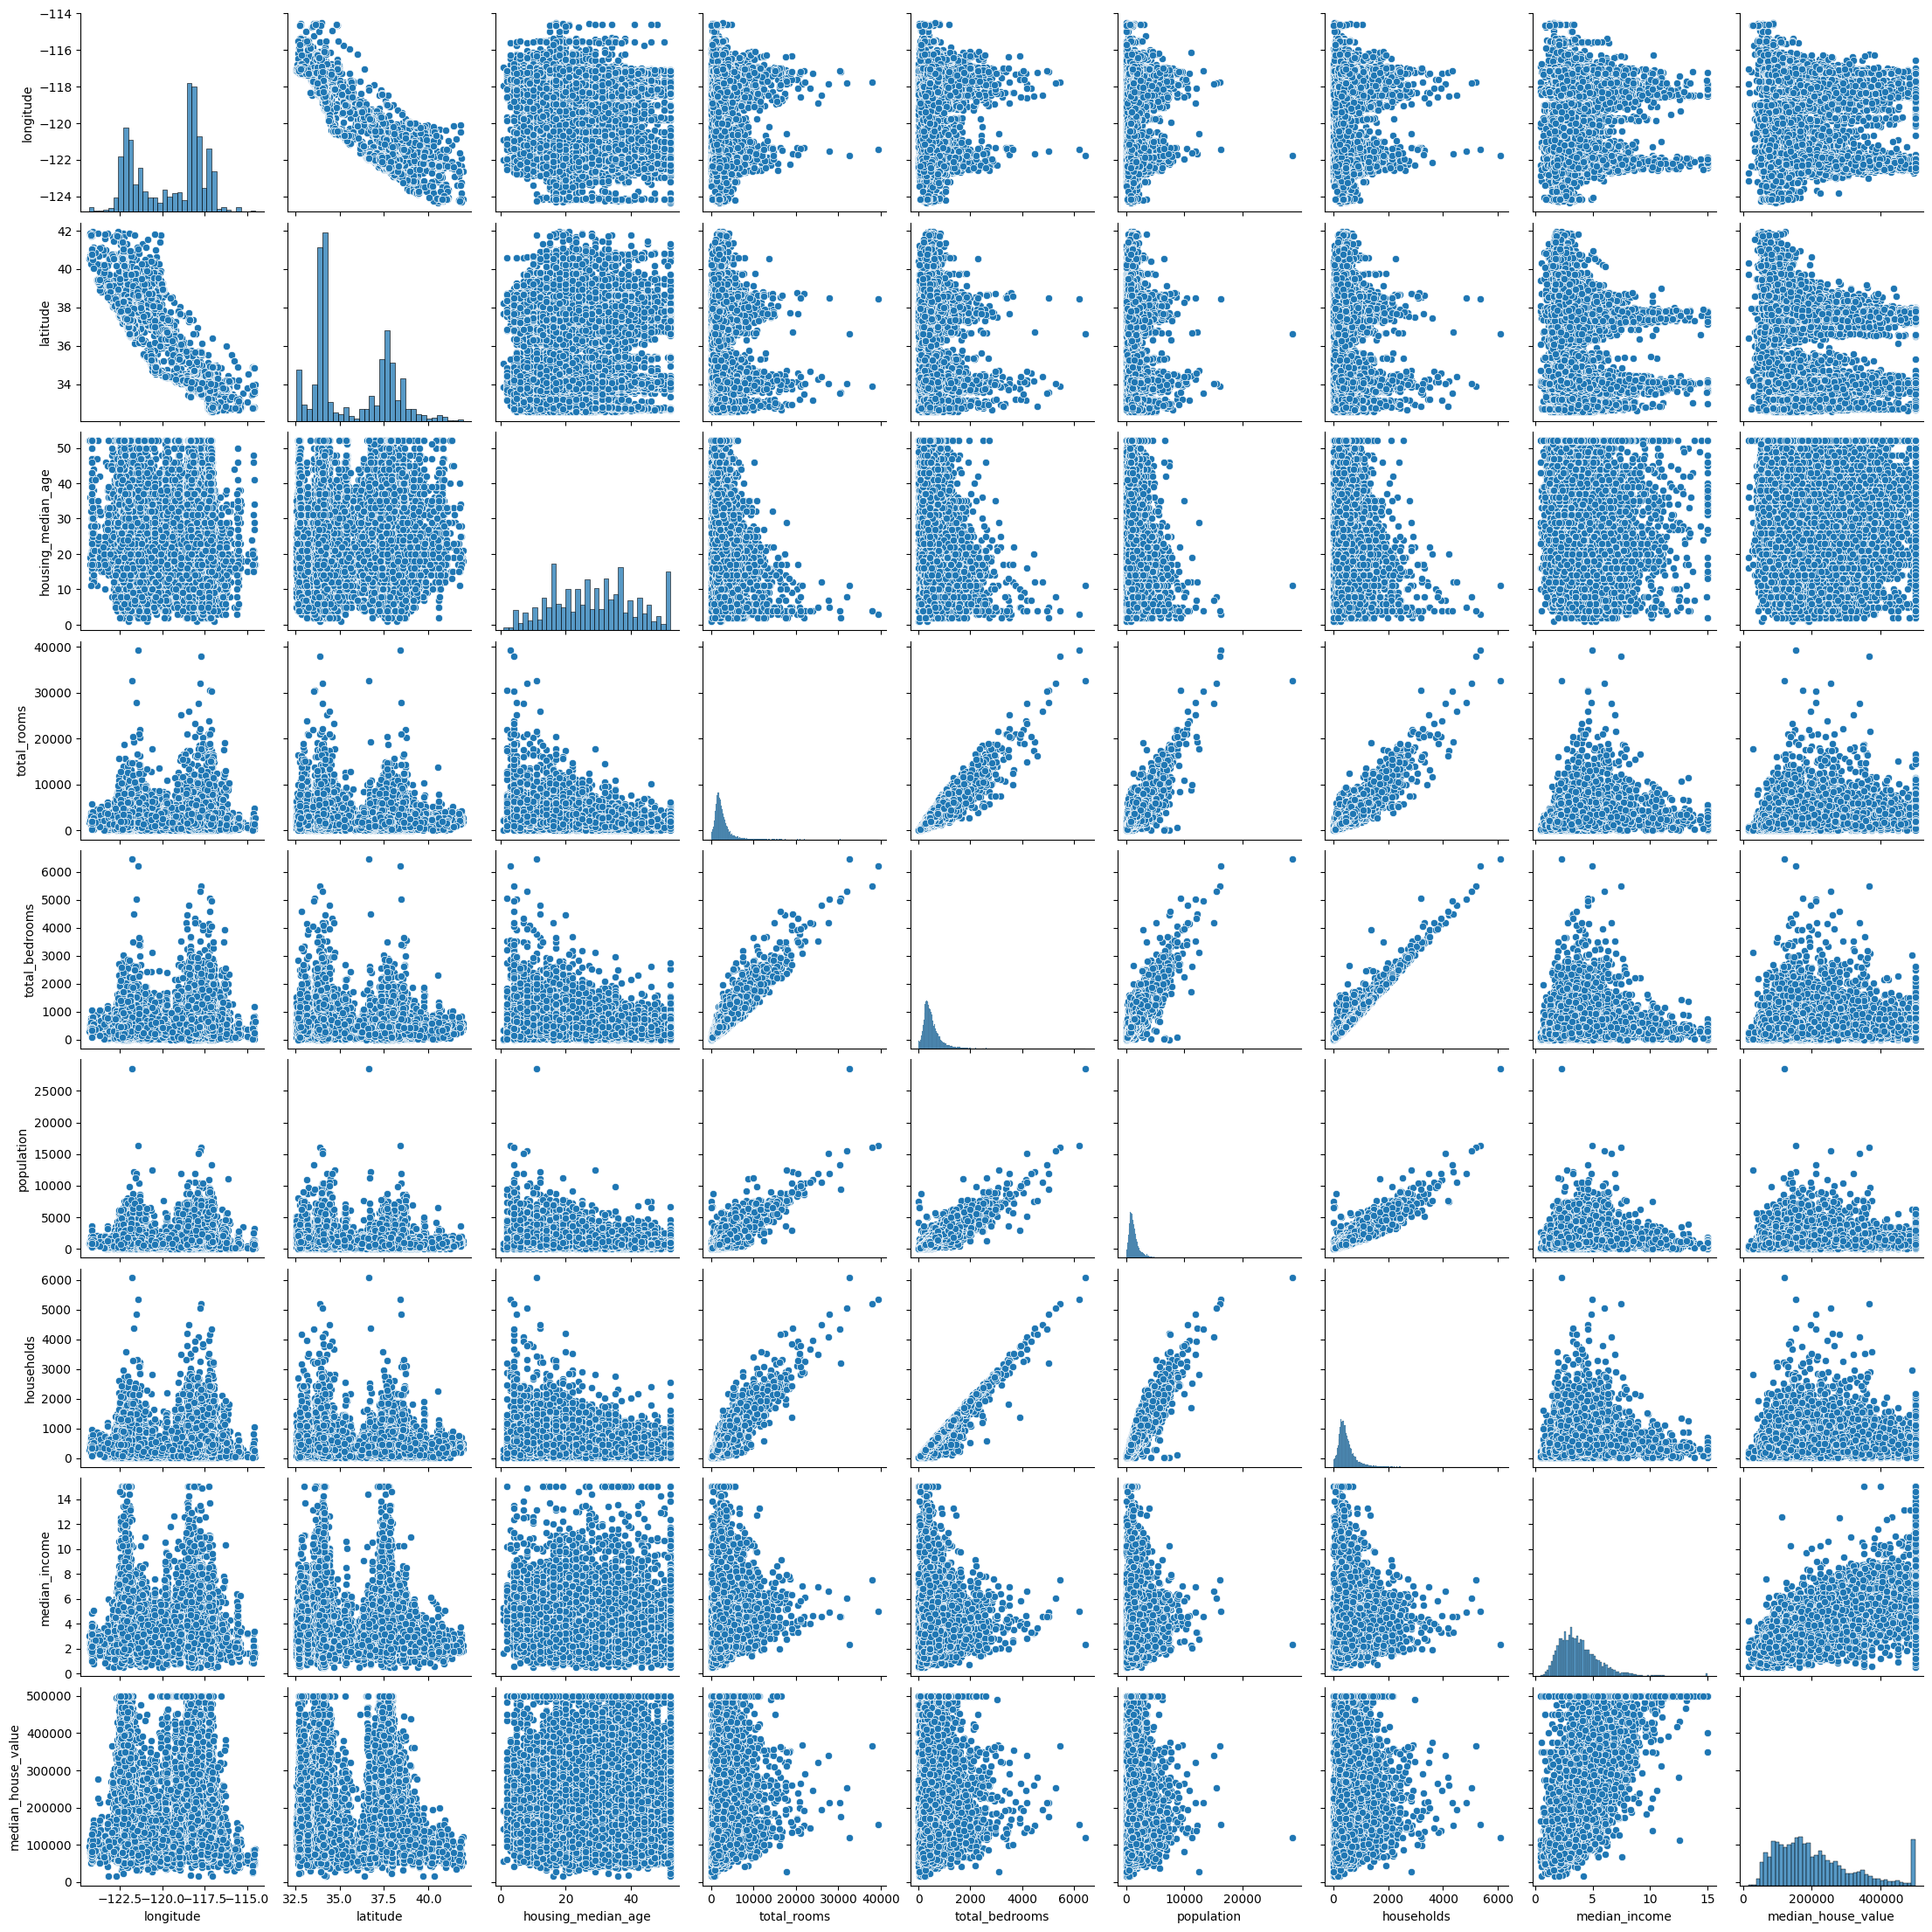

In [19]:
sns.pairplot(train_data)

# 4. Data Preprocessing

* Making data ready for the ML model.
* Applying the same steps to train and test sets.

    Key steps:
    * Filling missing values
    * Converting categorical features to numbers
    * Scaling numeric features

* Using functions wherever possible to apply the same steps consistently.

In [20]:
# Preparing training data
# x = all features except target
# y = target/label (median_house_value)

x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

In [21]:
x_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7728,-118.13,33.92,28.0,3069.0,864.0,1932.0,835.0,2.4925,<1H OCEAN
14565,-117.20,32.84,32.0,2033.0,394.0,989.0,389.0,3.2583,NEAR OCEAN
8099,-118.22,33.81,41.0,726.0,166.0,602.0,183.0,3.7885,NEAR OCEAN


In [22]:
y_train.head(3)

,median_house_value
7728,177200.0
14565,181400.0
8099,156900.0


Great, input training data no longer contain the label.

### Handling Missing Values
* Missing values are common in real datasets.
* Options to handle them:
    * Removing the missing values
    * Filling them with strategies like mean, median, most frequent, or constant
    * Leaving them (some models can handle missing values, e.g., tree-based)
* For linear models, missing values must be filled.
* Using Sklearn’s `SimpleImputer` to fill missing values (e.g., with mean, median, or mode).

In [23]:
from sklearn.impute import SimpleImputer

numerical_features = x_train.drop('ocean_proximity', axis=1)

# Imputing missing values in numerical features with mean
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features),
                                          columns=numerical_features.columns,
                                          index=numerical_features.index)

numerical_features_imputed.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


The feature `total_bedroom` was the one having missing values. No longer have the missing values in whole dataframe.

### Encoding Categorical Features

Categorical features are features which have categorical values. An example in my dataset is `ocean_proximity` that has the following values:

In [24]:
categorical_features = x_train[['ocean_proximity']]
categorical_features.value_counts()

,count
ocean_proximity,
<1H OCEAN,7326
INLAND,5217
NEAR OCEAN,2129
NEAR BAY,1836
ISLAND,4


### Handling Categorical Features:

I will use 3 methods:
1. Mapping,
2. Ordinal Encoding, and
3. One-Hot Encoding.

### 1. Handling Categorical Features with **Mapping**
* Creating a dictionary of category → number.
* Using .map() to convert categorical values into numeric.

In [25]:
# Encoding categorical feature 'ocean_proximity'
feature_map = {'<1H OCEAN':0, 'INLAND':1, 'NEAR OCEAN':2, 'NEAR BAY':3, 'ISLAND':4}
encoded_categorical_feature = x_train['ocean_proximity'].map(feature_map)

encoded_categorical_feature.head()

,ocean_proximity
7728,0
14565,2
8099,2
4772,0
11663,0


### 2. Handling Categorical Features with **Ordinal Encoding**

In [26]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
encoded_categorical_feature = encoder.fit_transform(x_train[['ocean_proximity']])

encoded_categorical_feature

array([[0.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

### 3. Handling Categorical Features with **One-Hot Encoding**
* Need to when categories have no order.
* Turns each category into a 0/1 column.
* Example: Ocean proximity → no order → OHE is best.

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_feature = encoder.fit_transform(x_train[['ocean_proximity']])

encoded_categorical_feature

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Scaling Numerical Features

* Scaling numeric features so that ML models work better.
* Two main methods:
    1. Normalization → scale to 0–1 (MinMaxScaler)
    2. Standardization → 0 mean & 1 std (StandardScaler)
* Standardization is better if outliers exist.

In [28]:
# Normalizing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

scaled_numerical_features

array([[0.63083164, 0.14574468, 0.52941176, ..., 0.06753492, 0.13700658,
        0.13741879],
       [0.72515213, 0.03085106, 0.60784314, ..., 0.03452018, 0.06365132,
        0.19023186],
       [0.62170385, 0.13404255, 0.78431373, ..., 0.02097119, 0.02976974,
        0.22679687],
       ...,
       [0.74340771, 0.02659574, 0.58823529, ..., 0.03942163, 0.07368421,
        0.27298934],
       [0.61663286, 0.16489362, 0.78431373, ..., 0.04764906, 0.11595395,
        0.36398808],
       [0.19269777, 0.55744681, 0.88235294, ..., 0.02653783, 0.07417763,
        0.22199004]])

In [29]:
# Standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

scaled_numerical_features

array([[ 0.71881493, -0.80067938, -0.04991797, ...,  0.46229672,
         0.88321751, -0.72607026],
       [ 1.18400647, -1.30699601,  0.26728254, ..., -0.39113438,
        -0.2898292 , -0.32294264],
       [ 0.67379639, -0.85224866,  0.98098368, ..., -0.74137599,
        -0.83164001, -0.04383809],
       ...,
       [ 1.27404354, -1.32574847,  0.18798241, ..., -0.26443199,
        -0.12939007,  0.30875381],
       [ 0.64878609, -0.71629327,  0.98098368, ..., -0.05175298,
         0.54655837,  1.00335669],
       [-1.44207482,  1.01362187,  1.37748432, ..., -0.59747828,
        -0.12149963, -0.08052913]])

### Data Pipeline
* So far, I explored different ways to clean and prepare data.
* Next, I combine everything into a single Pipeline for seamless preprocessing.

Steps:
1. Numerical Pipeline → handle missing values + scale features
2. Categorical Pipeline → encode categorical features
3. Combine both pipelines into one
* Using a pipeline allows me to apply all preprocessing at once without running each step individually.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # to fill missing values in the data
from sklearn.preprocessing import StandardScaler, OneHotEncoder # StandardScaler to scale numerical features,
                                                                # OneHotEncoder to convert categorical features into binary columns
from sklearn.compose import ColumnTransformer # ColumnTransformer to apply different transformations to different columns in my dataset


# (1) I create a numerical pipeline: impute missing values + scale
numerical_features_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])



# (2) I create a categorical pipeline: One-Hot Encode
categorical_features_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])



# (3) I combine numerical and categorical pipelines into a single ColumnTransformer
final_pipeline = ColumnTransformer([
    ('num', numerical_features_pipeline, list(numerical_features)),
    ('cat', categorical_features_pipeline, list(categorical_features))
])



# I apply all preprocessing steps at once
x_train_preprocessed = final_pipeline.fit_transform(x_train)


# Now I have data ready to feed into a machine learning model


# 5. Choosing and Training a Model

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_preprocessed, y_train)

LinearRegression()

In [32]:
# Coefficients → also called Weights
# Each coefficient corresponds to one feature

model.coef_

array([-54480.19245549, -55745.0537514 ,  13309.68071047,  -8557.51701588,
        28889.39663059, -49503.57525267,  33983.95418382,  72676.72610088,
       -21500.98209053, -60396.6917936 , 127625.39337431, -26853.27417182,
       -18874.44531837])

In [33]:
# Intercept → also called Bias
# This is a constant added in the linear equation

model.intercept_

np.float64(240792.8652962198)

# 6. Model Evaluation

Notes:
 - MAE → average absolute error (lower is better)
 - RMSE → like MAE but penalizes large errors more
 - R² → 1.0 is perfect, 0 means model is as bad as guessing the mean

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# I make predictions on the training data
y_train_pred = model.predict(x_train_preprocessed)

# I calculate errors by comparing true labels vs predicted labels
mse = mean_squared_error(y_train, y_train_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                               # Root MSE → easier to interpret
mae = mean_absolute_error(y_train, y_train_pred)  # Mean Absolute Error
r2 = r2_score(y_train, y_train_pred)              # R² score → how well model explains data

In [35]:
# Show results
print("Model Evaluation Results:")
print(f"MAE  (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R²   (R-squared): {r2:.2f}")

Model Evaluation Results:
MAE  (Mean Absolute Error): 49612.71
RMSE (Root Mean Squared Error): 68136.81
R²   (R-squared): 0.65


In [36]:
accuracy = r2 * 100
print(f"Accuracy (R² %): {accuracy:.2f}%")

Accuracy (R² %): 64.71%


### Model Evaluation with Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, x_train_preprocessed, y_train,
                         scoring='neg_root_mean_squared_error', cv=10)

rmse_cv = -scores.mean()

print(f"Cross-validated RMSE: {rmse_cv:.2f}")


Cross-validated RMSE: 68190.77


# 7. Improving the Model

Simple models work well for clean/simple datasets.

Complex models (Random Forest, Decision Trees, Ensembles) can improve results but risk overfitting.

Best improvements come from better data: cleaning, curating, and feature engineering matter most.